In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib.colors as mcolors
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acovf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acovf
import time


# From data 
#flowload_data = pd.read_csv('eleload.csv')  # hourly over for 10mins timestamp
#flowload_data = pd.read_csv('electric_onehour.csv')  # hourly deframe data of 1houur timestamp
#flowload_data = pd.read_csv('electric_oneday.csv')  # daily consumption deframe data for 24houurs timestamp
flowload_data = pd.read_csv('electric_oneday.csv')  # daily consumption deframe data for 24houurs timestamp
#flowload_data = pd.read_csv('electric_oneweek.csv')  # weekly consumption for deframe data of 168hours timestamp

winter_dates = flowload_data.iloc[:90]
#spring_dates = flowload_data.iloc[90:183]


#def winter():
    #winter_dates = flowload_data.iloc[90:182]
    #print(winter_dates.head(5))
    #print(winter_dates.tail(5))
    #print(winter_dates)
#winter()


# Prediction duration parameters

#total_time_len_day = 30 * 3   # Number of days of prediction winter 
total_time_len_day = 30 * 2   # Number of days of prediction spring
#total_time_len_day = 24 * 6   # Number of days of prediction 10mins/onehourly

length_of_predict = 30  # Number of future prediction (hour) hours winter/spring
#length_of_predict = 24  # Number of future prediction (hour) /onehour 
#length_of_predict = 12  # Number of future prediction (hour) 2hours/10mins
#length_of_predict = 60  # Number of future prediction (hour) 6momths 


# Data loading preparation
#actual = flowload_data.iloc[1:1 + total_time_len_day + length_of_predict, -1] # total lenght of prediction and forecast

#np.max(np.array(datain).ravel())


#sample_data = flowload_data.iloc[:, -1] # 
#sample_data = spring_dates.iloc[:, -1] # 
sample_data = winter_dates.iloc[:, -1] # 

#print(sample_data.head(5))
#print(sample_data.tail(5))

#datainf = flowload_data.iloc[:, -1].values  
datainf = winter_dates.iloc[:, -1].values  
#datainf = spring_dates.iloc[:, -1].values  


datainf = datainf / np.max(datainf)

data_pass_to = [None, total_time_len_day, length_of_predict]
actual = datainf[:total_time_len_day + length_of_predict]
#print(datainf)

Epoch 1/200
3/3 [==============================] - 1s 2ms/step - loss: 0.0719 - mse: 0.0719
Epoch 2/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0635 - mse: 0.0635
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0562 - mse: 0.0562
Epoch 4/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0496 - mse: 0.0496
Epoch 5/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0432 - mse: 0.0432
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0374 - mse: 0.0374
Epoch 7/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0320 - mse: 0.0320
Epoch 8/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0271 - mse: 0.0271
Epoch 9/200
3/3 [==============================] - 0s 2ms/step - loss: 0.0225 - mse: 0.0225
Epoch 10/200
3/3 [==============================] - 0s 4ms/step - loss: 0.0182 - mse: 0.0182
Epoch 11/200
3/3 [==============================] - 0s 3ms/step - loss: 0.0145 

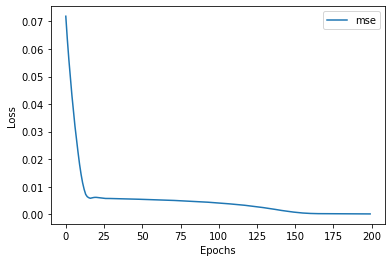

Time Spent for ann_p:  0 minutes 3.642 seconds
Time Spent for ann_r:  0 minutes 3.642 seconds


In [2]:

### Training data

split_size = int(0.8 * len(flowload_data))
# train_data = flowload_data.iloc[:split_size, -1].values
# test_data = flowload_data.iloc[split_size:, -1].values
train_data = datainf[:split_size]
test_data = datainf[split_size:]
#print(datainf.shape)



# ANN Prediction Model
#start_time_ann = time.time()
start_time_ann_p = time.time()
start_time_ann_r = time.time()

def ann_model(): 
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1,))) 
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 
 
    model.compile(optimizer='adam',
                  loss='mse',
                  metrics=['mse']) 
    
    # es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10,
    #         verbose=1, mode='auto', restore_best_weights=True,)
    history = model.fit(datainf, datainf, epochs=200)#, batch_size=30, callbacks=[es])
    
    return model, history
    

model, history = ann_model() 

pred = model.predict(datainf)


df = pd.DataFrame(history.history)
plt.plot(list(range(len(df.mse))), df.mse, label='mse')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#end_time_ann = time.time()
#process_time_ann = end_time_ann - start_time_ann_p
#minute_ann = process_time_ann // 60 
#second_ann = process_time_ann % 60 
#print(process_time_ann)
#print('Time Spent for ann: ', round(minute_ann), 'minutes', round(second_ann,3), 'seconds')

end_time_ann_p = time.time()
end_time_ann_r = time.time()
process_time_ann_p = end_time_ann_p - start_time_ann_p
process_time_ann_r = end_time_ann_r - start_time_ann_r
minute_ann_p = process_time_ann_p // 60 
minute_ann_r = process_time_ann_r // 60
second_ann_p = process_time_ann_p % 60 
second_ann_r = process_time_ann_r % 60 
#print(process_time_svr)
print('Time Spent for ann_p: ', round(minute_ann_p), 'minutes', round(second_ann_p,3), 'seconds')

print('Time Spent for ann_r: ', round(minute_ann_r), 'minutes', round(second_ann_r,3), 'seconds')






In [ ]:
# Performance Metrics Evaluation for Prediction
train_predictions = model.predict(train_data).flatten()
test_predictions = model.predict(test_data).flatten()

# Assuming 'kndata' and 'past_predictions' refer to known past data and their ANN predictions respectively
r2_train = r2_score(train_data, train_predictions)
rmse_train = np.sqrt(mean_squared_error(train_data, train_predictions))
ann_mae_train = mean_absolute_error(train_data, train_predictions)
mse_train = mean_squared_error(train_data, train_predictions)

# Assuming 'ukndata' and 'resout' refer to known future data and their ANN forecasts respectively
r2_test = r2_score(test_data, test_predictions)
rmse_test = np.sqrt(mean_squared_error(test_data, test_predictions))
ann_mae_test = mean_absolute_error(test_data, test_predictions)
mse_test = mean_squared_error(test_data, test_predictions)


# Print out metrics
print("Training Data - R2 Score:", r2_train, "RMSE:", rmse_train, "MAE:", ann_mae_train, "MSE:", mse_train)
print("Test Data - R2 Score:", r2_test, "RMSE:", rmse_test,"MAE:", ann_mae_test, "MSE:", mse_test)



3/3 [==============================] - 0s 3ms/step


ValueError: Expected input data to be non-empty.

In [ ]:
# Performance Metrics Evaluation for Prediction
# Assuming 'kndata' and 'past_predictions' refer to known past data and their ANN predictions respectively
r2_p = r2_score(train_data, pred)
rmse_p = np.sqrt(mean_squared_error(train_data, pred))
ann_mae_p = mean_absolute_error(train_data, pred)
mse_p = mean_squared_error(train_data, pred)

# Assuming 'ukndata' and 'resout' refer to known future data and their ANN forecasts respectively
r2_r = r2_score(test_data, pred)
rmse_r = np.sqrt(mean_squared_error(test_data, pred))
ann_mae_r = mean_absolute_error(test_data, pred)
mse_r = mean_squared_error(test_data, pred)


# Print out metrics
print("prediction - R2 Score:", r2_p, "RMSE:", rmse_p, "MAE:", ann_mae_p, "MSE:", mse_p)
print("forecast - R2 Score:", r2_r, "RMSE:", rmse_r,"MAE:", ann_mae_r, "MSE:", mse_r)
